In [220]:
def optimization_1(model, X, y, param_name, param_range, scoring = "accuracy", cv = 5, log_scale = False):
    '''
    validation_curve를 이용한 하이퍼파라미터 튜닝 함수(하나일 경우)
    첫번째 파라미터는 머신러닝 모델 : ex) DecisionTreeClassifier()  <- ()빼먹으면 안된다.
    param_name은 튜닝할 파라미터 이름 : ex) "max_depth" <- ""필수
    param_range는 파라미터의 범위 <- 리스트로 만들어서 주어야한다.
    scoring은 똑같이 지정 가능, 기본값은 "accuracy"
    cv : int
    log_scale : 만약 하이퍼파라미터 함수가 로그스케일경우 True를 주면 시각화시 semilogx를 사용
    '''
    from sklearn.model_selection import validation_curve
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    
    train_scores, validation_scores = validation_curve(model, X, y, param_name = param_name, param_range = param_range, cv = cv,
                                                 scoring = scoring, n_jobs = -1)

    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    validation_scores_mean = np.mean(validation_scores, axis = 1)
    validation_scores_std = np.std(validation_scores, axis = 1)

    # 시각화

    plt.title(f"Validation Curve with {model}")
    plt.xlabel(param_name)
    plt.ylabel(f"{scoring} score")
    plt.ylim(0.0, 1.1)
    if log_scale :
        plt.semilogx(param_range, train_scores_mean, label = "Training score",
                color = "darkorange", lw = 2)
        plt.fill_between(param_range, train_scores_mean-train_scores_std,
                        train_scores_mean + train_scores_std, alpha = 0.2, color = "darkorange", lw = 2)

        plt.semilogx(param_range, validation_scores_mean, label = "Cross-validation score",
                    color = "navy", lw = 2)
        plt.fill_between(param_range, validation_scores_mean - validation_scores_std,validation_scores_mean + validation_scores_std,
                         alpha = 0.2, color = "navy", lw = 2)
    else :
        plt.plot(param_range, train_scores_mean, label = "Training score",
                color = "darkorange", lw = 2, marker="o", markerfacecolor="white")
        plt.fill_between(param_range, train_scores_mean-train_scores_std,
                        train_scores_mean + train_scores_std, alpha = 0.2, color = "darkorange", lw = 2)

        plt.plot(param_range, validation_scores_mean, label = "Cross-validation score",
                    color = "navy", lw = 2, marker="o", markerfacecolor="white")
        plt.fill_between(param_range, validation_scores_mean - validation_scores_std,validation_scores_mean + validation_scores_std,
                         alpha = 0.2, color = "navy", lw = 2)
    
    best_score = validation_scores_mean.max() 
    best_params = param_range[validation_scores_mean.argmax()]
    
    plt.axvline(best_params, color = "tab:red", ls = "--")
    plt.text(best_params, best_score+0.1, f" Best Score\n  : {best_score:.4f}", color = "tab:red", ha = "left")
    plt.text(best_params, 0.01, "Best", color = "k", ha = "center", size = 10, fontweight = "bold")
    plt.xticks(param_range)
#     plt.ylim(0.90,0.95)
    plt.legend(loc = "best")
    plt.show();
    
    print("-"*70)
    print(f'Best {scoring} score : {best_score:.5f}\nBest {param_name} : {best_params}')
    print("-"*70)


In [203]:
# 통계
import scipy.stats as spst
import statsmodels.api as sm
import statsmodels

#  기본
import time
from tqdm.notebook import tqdm
import  numpy as np
import pandas as pd
import os, re, sys
import warnings 
warnings.filterwarnings(action='ignore')

# 시각화
# from dataprep.eda import plot, plot_correlation, plot_missing
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.cm as cm    
import matplotlib as mpl
import matplotlib.image as mpimg
from matplotlib import font_manager
import seaborn as sns 
import graphviz

# 지도
import folium
from folium import plugins
import branca
import vincent

# 전처리
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# 표본추출
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, RepeatedKFold

# 하이퍼파라미터 튜닝
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# model
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree
import lightgbm as lgb
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

# pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 평가지표
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# 크롤링
import urllib.request  # 받아온 이미지 속성값을 원하는 경로에 바로 저장
from selenium import webdriver
from selenium.webdriver.common.keys import Keys  # 엔터키를 입력할 때, 값..?
from selenium.webdriver.common.by import By  # 
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager  # 일일이 크롬드라이버를 업데이트하는 것을 방지하기 위해
from bs4 import BeautifulSoup
import json
import requests

# 데이터셋 만들기
from sklearn.datasets import make_regression, make_classification, make_blobs

# 한글 맑은 고딕 폰트, 선명도, 마이너스 부호
%config inlinebackend.figure_format = "retina"
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 마이너스 부호 깨짐 현상 해결
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')        

#한글깨짐 해결
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

# AIVLE스쿨 3기 DX트랙 5차 미니프로젝트 
## [미션3] 중증질환 예측 모델링

[미션] 
 * Target : 중증질환 (뇌경색, 뇌출혈, 복부손상, 심근경색)
 * 데이터 분석 결과를 바탕으로 Target에 영향을 주는 Feature 전처리 (함수 정의)
 * 머신러닝/딥러닝 모델링 후 성능 비교
 * 최적AI 모델 선정 및 저장
 * 새로운 출동 이력에 제시된 환자의 증상을 바탕으로 중증 질환 예측 함수 정의

 * 사전 확인 사항 
   * keras 버전 == 2.11.0

In [13]:
## windows 도스창 기준입니다.
## keras 버전 확인
!pip list | find "keras" 

keras                             2.11.0


In [14]:
# keras 버전 맞추기
!pip install keras==2.11.0 --upgrade --user

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# 응급 출동 데이터 불러오기
# 파일명 : 119_emergency_dispatch.csv
# 중증 질환이 ['심근경색', '복부손상', '뇌경색', '뇌출혈']인 데이터만 추출
# 데이터 랜덤으로 섞기

data = pd.read_csv("119_emergency_dispatch.csv", encoding="cp949")
desease = data[data["중증질환"].isin(['심근경색', '복부손상', '뇌경색', '뇌출혈'])]

# 데이터 랜덤으로 섞기

desease = desease.sample(frac=1).reset_index(drop=True)

In [3]:
data = pd.read_csv("data.csv")
desease = data[data["중증질환"].isin(['심근경색', '복부손상', '뇌경색', '뇌출혈'])]

# 데이터 랜덤으로 섞기

desease = desease.sample(frac=1).reset_index(drop=True)

# 1 학습용, 평가용 데이터 준비하기

 * 함수로 전처리 과정을 정의
   * Target : 중증질환
   * 전처리 대상 : 발열, 고혈압, 저혈압
   * Feature : '체온', '수축기 혈압', '이완기 혈압', '호흡 곤란', '간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다', 
           '무감각', '마비', '현기증', '졸도', '말이 어눌해졌다', '시력이 흐려짐', '발열', '고혈압', '저혈압'
   * Feature와 Target을 분리하여 결과값 return
 

In [4]:
def preprocessing(desease):
    y = desease[["중증질환"]]
    X = desease[['체온', '수축기 혈압', '이완기 혈압', '호흡 곤란', '간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다','무감각', '마비', '현기증', '졸도', '말이 어눌해졌다', '시력이 흐려짐', '발열', '고혈압', '저혈압']]
    return X, y

In [5]:
# x, y 데이터 나누기
# preprocessing 함수 활용하여 전처리까지 완료하고 데이터 분리

X, y = preprocessing(desease)

In [6]:
pd.options.display.max_columns = 100

In [7]:
X.head()

,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,설사,기침,출혈,통증,만지면 아프다,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,발열,고혈압,저혈압
0,36.0,109.0,80.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,36.9,122.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
2,36.9,121.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,36.4,121.0,83.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,36.4,108.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0,0,0


In [8]:
X.describe()

,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,설사,기침,출혈,통증,만지면 아프다,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,발열,고혈압,저혈압
count,17024.000000,17024.000000,17024.000000,17024.000000,17024.000000,17024.000000,17024.000000,17024.000000,17024.000000,17024.000000,17024.000000,17024.000000,17024.000000,17024.000000,17024.000000,17024.000000,17024.000000,17024.000000,17024.000000
mean,36.599430,113.810914,74.162477,0.240719,0.096393,0.079124,0.029958,0.059857,0.123708,0.240367,0.313264,0.159422,0.180686,0.143621,0.268268,0.090226,0.075775,0.016917,0.033482
std,0.635988,13.742302,9.360560,0.427533,0.295139,0.269939,0.170476,0.237228,0.329257,0.427319,0.463834,0.366080,0.384769,0.350715,0.443071,0.286513,0.264646,0.128965,0.179897
min,36.000000,70.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.200000,104.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.500000,114.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36.800000,124.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,39.900000,159.000000,129.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# 데이터 분할 비율: 학습데이터 7 : 검증데이터 3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [10]:
X_train

,체온,수축기 혈압,이완기 혈압,호흡 곤란,간헐성 경련,설사,기침,출혈,통증,만지면 아프다,무감각,마비,현기증,졸도,말이 어눌해졌다,시력이 흐려짐,발열,고혈압,저혈압
12040,36.9,104.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
8556,36.5,125.0,81.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
5987,36.0,131.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
10466,39.4,125.0,75.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0
7707,36.5,97.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4787,36.2,119.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0
16222,36.7,124.0,76.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
15247,36.8,120.0,71.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
14951,36.3,118.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0


# 2 모델링

 * 활용 모델 : DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, DNN
 * 성능 평가 : accuracy_score

In [11]:
import sys
sys.path.append("C:/Users/User/박은호/")

from Eunho import *

## 2-1 DecisionTree

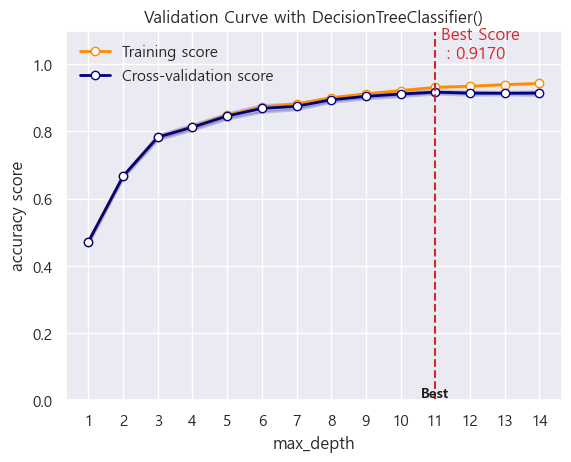

----------------------------------------------------------------------
Best accuracy score : 0.91700
Best max_depth : 11
----------------------------------------------------------------------


In [212]:
max_depths = list(range(1,15))
optimization_1(DecisionTreeClassifier(), X_train, y_train, param_name="max_depth", param_range=max_depths)

In [45]:
## Decision Tree
## 1) 불러오기
from sklearn.tree import DecisionTreeClassifier

## 2) 선언하기
tree = DecisionTreeClassifier(max_depth=11)

## 3) 학습하기
tree.fit(X_train, y_train)

## 4) 예측하기
t_pred = tree.predict(X_test)

## 5) 평가하기
print(f"Train Score : {tree.score(X_train, y_train):.3f}")
print(f"Test Score : {tree.score(X_test, y_test):.3f}")


Train Score : 0.929
Test Score : 0.915


In [46]:
print(classification_report(y_test, t_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1229
           1       0.87      0.85      0.86      1267
           2       0.92      0.93      0.92      1229
           3       0.90      0.90      0.90      1383

    accuracy                           0.92      5108
   macro avg       0.92      0.92      0.92      5108
weighted avg       0.91      0.92      0.92      5108



Test Score : 0.9152


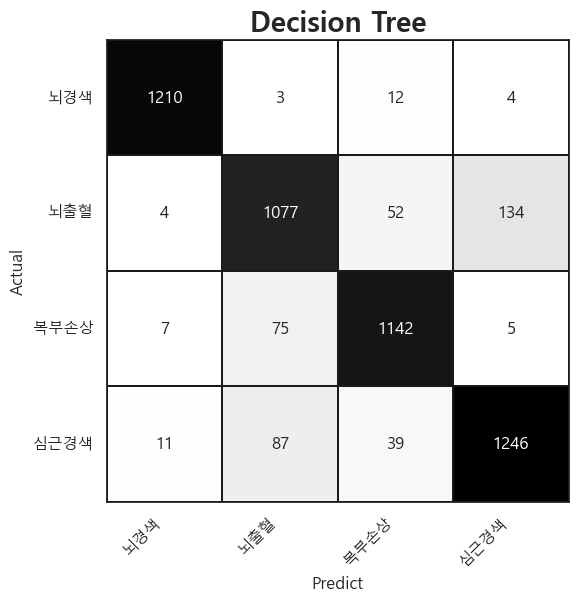

In [208]:
print(f"Test Score : {accuracy_score(y_test, t_pred):.4f}")

cm = pd.crosstab(y_test["중증질환"], t_pred) # Series로
cm.index = ['뇌경색', '뇌출혈', '복부손상', '심근경색']
cm.columns = ['뇌경색', '뇌출혈', '복부손상', '심근경색']

plt.figure(figsize = (6,6))
sns.heatmap(cm, annot = True, cmap = "binary", cbar = False, square = True, fmt = "d", lw = 0.2, linecolor = "k" )
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.xticks(rotation = 45, ha = "right")
plt.yticks(rotation = 0)
plt.title("Decision Tree",fontweight = "bold", fontsize = 20)


ax = plt.gca()


for label in ["bottom","top","left","right"]:
    ax.spines[label].set_color("k")
    ax.spines[label].set_visible(True)

In [135]:
model_scores = pd.DataFrame(columns=["score"])
model_scores.loc["DecisionTree", "score"] = round(accuracy_score(y_test, t_pred),4)

In [136]:
model_scores

,score
DecisionTree,0.9152


## 2-2 RandomForest

In [50]:
# GridSearchCV로 적용
# gridsearch는 fit, predict, score, predict_proba, decision_function 메서드를 지원
# gridsearch를 시행하면 가장 좋은 매개변수로 전체 훈련 데이터셋에 대해 새로운 모델을 자동으로 만드는 '래퍼(wrapper)' 방식

param_grid = {'max_depth' : [2, 4, 6, 8, 10],
              'n_estimators' : [100, 300, 500, 700, 1000]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv = 5, return_train_score = True)

grid_search.fit(X_train, y_train)

print(f"Best Score : {grid_search.best_score_:.2f}")
print("Best params : ", grid_search.best_params_)
print(f"Test Set Score : {grid_search.score(X_test, y_test)}")

Best Score : 0.92
Best params :  {'max_depth': 10, 'n_estimators': 500}
Test Set Score : 0.9189506656225529


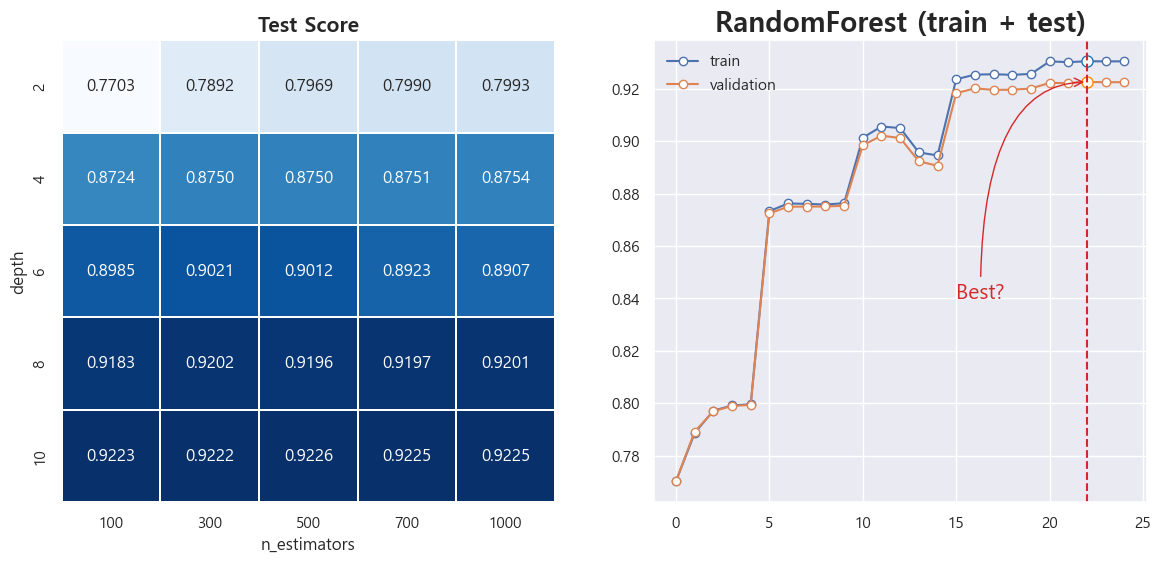

In [77]:
results = pd.DataFrame(grid_search.cv_results_)

scores = pd.DataFrame(grid_search.cv_results_["mean_test_score"].reshape(5,5))
scores.index = [2, 4, 6, 8, 10]
scores.columns = [100, 300, 500, 700, 1000]

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.heatmap(scores, cmap = "Blues", lw = 0.2, annot = True,fmt = ".4f",cbar=False)
plt.xlabel("n_estimators")
plt.ylabel("depth")
plt.title("Test Score", weight="bold", size=15)

plt.subplot(1,2,2)
best_test_loc = results.mean_test_score[results.mean_test_score == grid_search.best_score_]
best_train_loc = results.mean_train_score[results.mean_test_score == grid_search.best_score_]

plt.plot(results.mean_train_score, label = "train",marker = "o", markerfacecolor = "white")
plt.plot(results.mean_test_score, label = "validation",marker = "o", markerfacecolor = "white")

plt.plot(best_test_loc.index, best_test_loc.values,
         marker = "o",markerfacecolor = "white", markersize = 8, color = "darkorange")

plt.plot(best_train_loc.index, best_train_loc.values,
         marker = "o", markerfacecolor = "white", markersize = 8, color = "tab:blue")
plt.axvline(x = best_train_loc.index, ls = "--", color = "tab:red")
plt.annotate("Best?", xy = (results[results["params"] == grid_search.best_params_].index.values, grid_search.best_score_), xytext = (15, 0.84),color = "tab:red",fontsize = 15,
                 arrowprops = {"arrowstyle":"->","connectionstyle":"angle3", "color" : "tab:red"});
plt.title("RandomForest (train + test)", fontsize = 20, fontweight = "bold")
plt.legend(loc = "best");


Test Score : 0.9190


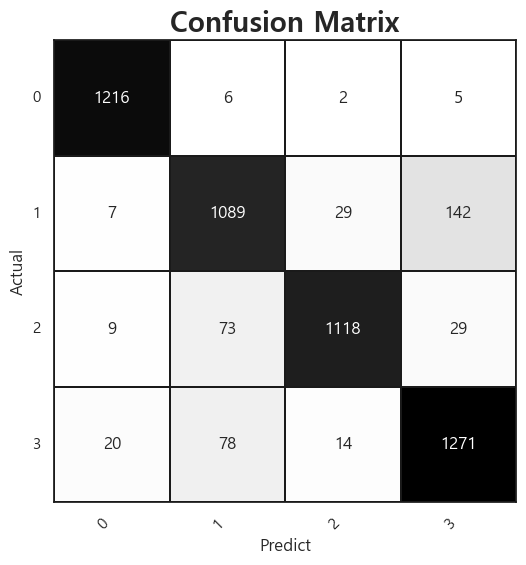

In [52]:
rf_pred = grid_search.predict(X_test)

print(f"Test Score : {accuracy_score(y_test, rf_pred):.4f}")

cm = pd.crosstab(y_test["중증질환"], rf_pred) # Series로

plt.figure(figsize = (6,6))
sns.heatmap(cm, annot = True, cmap = "binary", cbar = False, square = True, fmt = "d", lw = 0.2, linecolor = "k" )
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.xticks(rotation = 45, ha = "right")
plt.yticks(rotation = 0)

plt.title("Confusion Matrix",fontweight = "bold", fontsize = 20)


ax = plt.gca()


for label in ["bottom","top","left","right"]:
    ax.spines[label].set_color("k")
    ax.spines[label].set_visible(True)

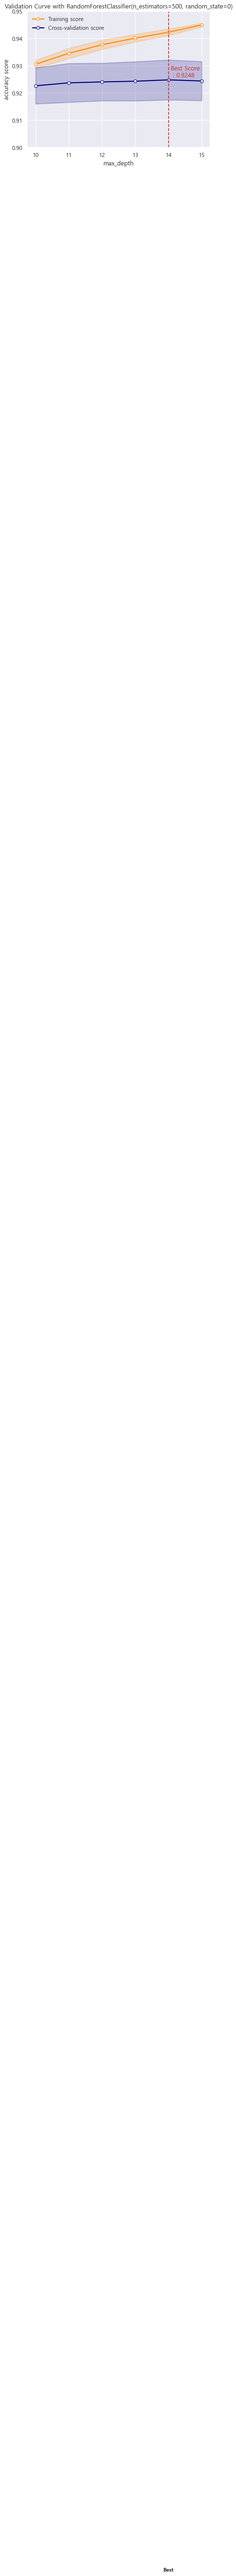

----------------------------------------------------------------------
Best accuracy score : 0.92481
Best max_depth : 14
----------------------------------------------------------------------


In [221]:
max_depths = list(range(10,15+1))
optimization_1(RandomForestClassifier(random_state=0, n_estimators=500), X_train, y_train, param_name="max_depth", param_range=max_depths)

In [58]:
rf = RandomForestClassifier(random_state=0, n_estimators=500, max_depth=14, n_jobs=-1)
rf.fit(X_train, y_train)
rf14_pred = rf.predict(X_test)
print(f"Test Set Score : {rf.score(X_test, y_test)}")

Test Set Score : 0.9220830070477682


In [59]:
print(classification_report(y_test, rf14_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1229
           1       0.88      0.86      0.87      1267
           2       0.96      0.92      0.94      1229
           3       0.88      0.93      0.90      1383

    accuracy                           0.92      5108
   macro avg       0.92      0.92      0.92      5108
weighted avg       0.92      0.92      0.92      5108



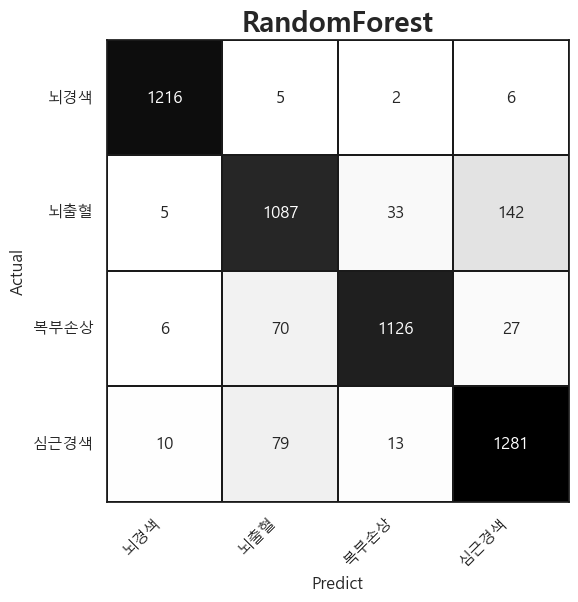

In [207]:
cm = pd.crosstab(y_test["중증질환"], rf14_pred) # Series로
cm.index = ['뇌경색', '뇌출혈', '복부손상', '심근경색']
cm.columns = ['뇌경색', '뇌출혈', '복부손상', '심근경색']

plt.figure(figsize = (6,6))
sns.heatmap(cm, annot = True, cmap = "binary", cbar = False, square = True, fmt = "d", lw = 0.2, linecolor = "k" )
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.xticks(rotation = 45, ha = "right")
plt.yticks(rotation = 0)

plt.title("RandomForest",fontweight = "bold", fontsize = 20)


ax = plt.gca()


for label in ["bottom","top","left","right"]:
    ax.spines[label].set_color("k")
    ax.spines[label].set_visible(True)

In [137]:
model_scores.loc["RandomForest", "score"] = round(rf.score(X_test, y_test), 4)

In [138]:
model_scores

,score
DecisionTree,0.9152
RandomForest,0.9221


## 2-3 LightGBM

In [63]:
from sklearn.metrics import *

- LGM basic

In [13]:
symptom = {'뇌경색':0, '뇌출혈':1, '복부손상':2, '심근경색':3}

In [15]:
lgb_y = y[["중증질환"]].replace(symptom)

In [16]:
lgb_X_train, lgb_X_test, lgb_y_train, lgb_y_test = train_test_split(X, lgb_y, test_size=0.3, random_state=0, stratify=gb_y)

In [17]:
import time

start = time.time() # 시작 시간 지정
lgb_dtrain = lgb.Dataset(data = lgb_X_train, label = lgb_y_train) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 15, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 500, # Number of trees, 트리 생성 개수
            'objective': 'multiclass',
            'num_class': 4} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.

ligthgbm = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
end = time.time()

print("time :", end - start)

C:\Users\User\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 243
[LightGBM] [Info] Number of data points in the train set: 11916, number of used features: 19
[LightGBM] [Info] Start training from score -1.393707
[LightGBM] [Info] Start training from score -1.424616
[LightGBM] [Info] Start training from score -1.306949
[LightGBM] [Info] Start training from score -1.424616
time : 2.1760365962982178


In [65]:
train_pred = pd.DataFrame(ligthgbm.predict(lgb_X_train))
lgb_train_pred = list(train_pred.apply(lambda x: x.argmax(), axis = 1).values)
accuracy_score(lgb_y_train, lgb_train_pred)

0.9371433366901645

In [68]:
predicts = pd.DataFrame(ligthgbm.predict(lgb_X_test))
lgb_pred = list(predicts.apply(lambda x: x.argmax(), axis = 1).values)
accuracy_score(lgb_y_test, lgb_pred)

0.9220830070477682

In [71]:
print(classification_report(lgb_y_test, lgb_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1267
           1       0.95      0.92      0.94      1229
           2       0.89      0.91      0.90      1383
           3       0.98      0.98      0.98      1229

    accuracy                           0.92      5108
   macro avg       0.92      0.92      0.92      5108
weighted avg       0.92      0.92      0.92      5108



Test Score : 0.9221


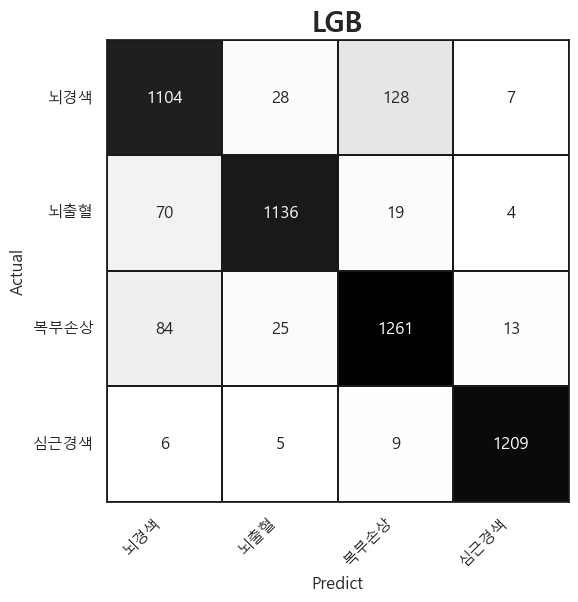

In [206]:
print(f"Test Score : {accuracy_score(lgb_y_test, lgb_pred):.4f}")

cm = pd.crosstab(lgb_y_test["중증질환"], lgb_pred) # Series로
cm.index = ['뇌경색', '뇌출혈', '복부손상', '심근경색']
cm.columns = ['뇌경색', '뇌출혈', '복부손상', '심근경색']

plt.figure(figsize = (6,6))
sns.heatmap(cm, annot = True, cmap = "binary", cbar = False, square = True, fmt = "d", lw = 0.2, linecolor = "k" )
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.xticks(rotation = 45, ha = "right")
plt.yticks(rotation = 0)
plt.title("LGB",fontweight = "bold", fontsize = 20)


ax = plt.gca()


for label in ["bottom","top","left","right"]:
    ax.spines[label].set_color("k")
    ax.spines[label].set_visible(True)

In [140]:
model_scores.loc["LGB", "score"] = round(accuracy_score(lgb_y_test, lgb_pred), 4)

In [141]:
model_scores

,score
DecisionTree,0.9152
RandomForest,0.9221
LGB,0.9221


- LGB bagging

In [22]:
bagging_predict_result = []
for _ in tqdm(range(100)):
    data_index = [index for index in range(lgb_X_train.shape[0])]
    
    # 데이터의 인덱스에서 데이터 인덱스의 크기만큼 랜더복원추출
    random_index = np.random.choice(data_index, lgb_X_train.shape[0])
    print(len(set(random_index)))
    lgb_dtrain = lgb.Dataset(data = lgb_X_train.iloc[random_index,:],
                             label = lgb_y_train.iloc[random_index])
    lgb_param = {'max_depth': 15, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 500, # Number of trees, 트리 생성 개수
            'objective': 'multiclass',
            'num_class': 6} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
    model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
    
    
    predicts = pd.DataFrame(model.predict(lgb_X_test))
    y_pred = list(predicts.apply(lambda x: x.argmax(), axis = 1).values)
    bagging_predict_result.append(y_pred)

  0%|          | 0/100 [00:00<?, ?it/s]

7509
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 11916, number of used features: 19
[LightGBM] [Info] Start training from score -1.378270
[LightGBM] [Info] Start training from score -1.428810
[LightGBM] [Info] Start training from score -1.315356
[LightGBM] [Info] Start training from score -1.427060
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start train

7544
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 11916, number of used features: 19
[LightGBM] [Info] Start training from score -1.389994
[LightGBM] [Info] Start training from score -1.431265
[LightGBM] [Info] Start training from score -1.308190
[LightGBM] [Info] Start training from score -1.420439
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start train

7555
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 11916, number of used features: 19
[LightGBM] [Info] Start training from score -1.383947
[LightGBM] [Info] Start training from score -1.410073
[LightGBM] [Info] Start training from score -1.322574
[LightGBM] [Info] Start training from score -1.431968
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start train

7434
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 241
[LightGBM] [Info] Number of data points in the train set: 11916, number of used features: 19
[LightGBM] [Info] Start training from score -1.404929
[LightGBM] [Info] Start training from score -1.435840
[LightGBM] [Info] Start training from score -1.279726
[LightGBM] [Info] Start training from score -1.433022
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start train

7508
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 11916, number of used features: 19
[LightGBM] [Info] Start training from score -1.380604
[LightGBM] [Info] Start training from score -1.429862
[LightGBM] [Info] Start training from score -1.313482
[LightGBM] [Info] Start training from score -1.425663
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start train

7547
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 11916, number of used features: 19
[LightGBM] [Info] Start training from score -1.396416
[LightGBM] [Info] Start training from score -1.457231
[LightGBM] [Info] Start training from score -1.277917
[LightGBM] [Info] Start training from score -1.422873
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start train

7483
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 238
[LightGBM] [Info] Number of data points in the train set: 11916, number of used features: 19
[LightGBM] [Info] Start training from score -1.397434
[LightGBM] [Info] Start training from score -1.428810
[LightGBM] [Info] Start training from score -1.311300
[LightGBM] [Info] Start training from score -1.411793
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start train

7470
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 11916, number of used features: 19
[LightGBM] [Info] Start training from score -1.390668
[LightGBM] [Info] Start training from score -1.468465
[LightGBM] [Info] Start training from score -1.280934
[LightGBM] [Info] Start training from score -1.414552
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start train

7465
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 11916, number of used features: 19
[LightGBM] [Info] Start training from score -1.385623
[LightGBM] [Info] Start training from score -1.443275
[LightGBM] [Info] Start training from score -1.318175
[LightGBM] [Info] Start training from score -1.402197
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start train

7508
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 11916, number of used features: 19
[LightGBM] [Info] Start training from score -1.415242
[LightGBM] [Info] Start training from score -1.397773
[LightGBM] [Info] Start training from score -1.330162
[LightGBM] [Info] Start training from score -1.404246
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start train

7527
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 11916, number of used features: 19
[LightGBM] [Info] Start training from score -1.381606
[LightGBM] [Info] Start training from score -1.433374
[LightGBM] [Info] Start training from score -1.326045
[LightGBM] [Info] Start training from score -1.407326
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start train

7543
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 241
[LightGBM] [Info] Number of data points in the train set: 11916, number of used features: 19
[LightGBM] [Info] Start training from score -1.381606
[LightGBM] [Info] Start training from score -1.458674
[LightGBM] [Info] Start training from score -1.309433
[LightGBM] [Info] Start training from score -1.401175
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start train

7545
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 11916, number of used features: 19
[LightGBM] [Info] Start training from score -1.385959
[LightGBM] [Info] Start training from score -1.435487
[LightGBM] [Info] Start training from score -1.300767
[LightGBM] [Info] Start training from score -1.428810
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start train

In [24]:
def most_frequent(my_list):
    return max(my_list, key=my_list.count)

bagging_predict = []
for lst2_index in range(lgb_X_test.shape[0]):
    temp_predict = []
    for lst_index in range(len(bagging_predict_result)): # Bagging 결과 리스트 반복
        temp_predict.append(bagging_predict_result[lst_index][lst2_index])
    bagging_predict.append(most_frequent(temp_predict))

In [73]:
print(f"Test Score : {accuracy_score(lgb_y_test, bagging_predict):.4f}")

Test Score : 0.9227


Test Score : 0.9227


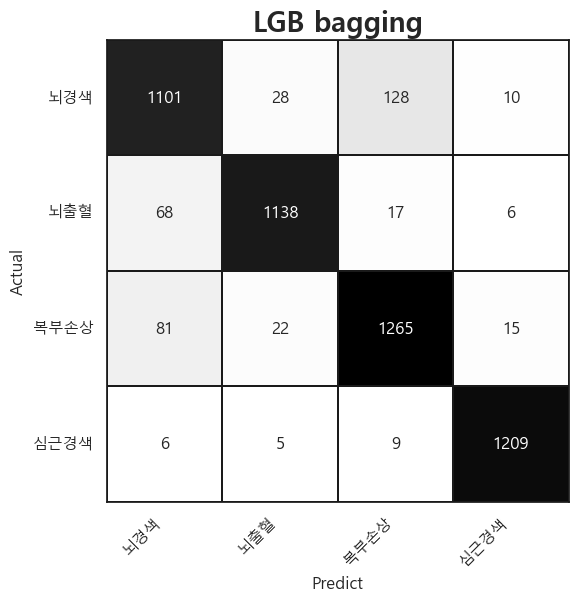

In [205]:
print(f"Test Score : {accuracy_score(lgb_y_test, bagging_predict):.4f}")

cm = pd.crosstab(lgb_y_test["중증질환"].values , bagging_predict)
cm.index = ['뇌경색', '뇌출혈', '복부손상', '심근경색']
cm.columns = ['뇌경색', '뇌출혈', '복부손상', '심근경색']

plt.figure(figsize = (6,6))
sns.heatmap(cm, annot = True, cmap = "binary", cbar = False, square = True, fmt = "d", lw = 0.2, linecolor = "k" )
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.xticks(rotation = 45, ha = "right")
plt.yticks(rotation = 0)
plt.title("LGB bagging",fontweight = "bold", fontsize = 20)

ax = plt.gca()


for label in ["bottom","top","left","right"]:
    ax.spines[label].set_color("k")
    ax.spines[label].set_visible(True)

In [142]:
model_scores.loc["LGB bagging", "score"] = round(accuracy_score(lgb_y_test, bagging_predict), 4)
model_scores

- XGBoost

In [222]:
start = time.time()
param_grid = {'max_depth' : [1, 2, 3, 4, 5],
              'n_estimators' : [300, 500, 700, 900, 1200],
              'learning_rate' : np.logspace(-3,1,5)}
# 모델 선언
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv = 5,scoring = 'accuracy', return_train_score = True)
xgb_grid.fit(lgb_X_train, lgb_y_train)
xgb_pred = xgb_grid.predict(lgb_X_test)

end = time.time()
print("time :", end - start)
print(xgb_grid.best_params_)

time : 4186.680822849274
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}


In [224]:
print(f"Best Score : {xgb_grid.best_score_:.4f}")
print("Best params : ", xgb_grid.best_params_)
print(f"Test Set Score : {accuracy_score(lgb_y_test['중증질환'], xgb_pred):.4f}")

Best Score : 0.9204
Best params :  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Test Set Score : 0.9260


In [225]:
pd.options.display.max_rows=1000

In [226]:
pd.DataFrame(xgb_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.907113,0.067597,0.007202,0.001504,0.001,1,300,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.689178,0.694503,0.702896,0.691985,0.695342,0.694781,0.004592,100,0.696181,0.694849,0.692751,0.695479,0.694640,0.694780,0.001148
1,1.527555,0.061826,0.008498,0.001431,0.001,1,500,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.717282,0.720101,0.730172,0.724297,0.726815,0.723733,0.004606,97,0.724087,0.723382,0.720864,0.724641,0.724011,0.723397,0.001328
2,2.827396,0.533258,0.012779,0.002895,0.001,1,700,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.717282,0.720101,0.730172,0.721360,0.724717,0.722726,0.004423,98,0.724087,0.723382,0.720864,0.723067,0.722228,0.722726,0.001106
3,5.094060,0.702951,0.021440,0.002427,0.001,1,900,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.717282,0.720101,0.730172,0.721360,0.724717,0.722726,0.004423,98,0.724087,0.723382,0.720864,0.723067,0.722228,0.722726,0.001106
4,5.500779,0.199730,0.023275,0.005336,0.001,1,1200,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.748322,0.756190,0.761645,0.753252,0.758708,0.755623,0.004583,96,0.757449,0.755481,0.754117,0.756215,0.754852,0.755623,0.001146
5,2.692215,0.560498,0.017895,0.005559,0.001,2,300,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.830117,0.819975,0.843894,0.824591,0.834243,0.830564,0.008237,86,0.835606,0.826183,0.839924,0.825029,0.834575,0.832263,0.005736
6,4.624862,0.842206,0.018963,0.004605,0.001,2,500,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.828859,0.819975,0.840957,0.824591,0.834243,0.829725,0.007331,88,0.834138,0.826183,0.838875,0.825029,0.834575,0.831760,0.005303
7,4.934664,0.740082,0.019295,0.001592,0.001,2,700,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.828859,0.819975,0.838019,0.822493,0.832984,0.828466,0.006627,90,0.834138,0.826183,0.831533,0.823770,0.833106,0.829746,0.004054
8,6.463975,0.382682,0.027639,0.002989,0.001,2,900,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.828859,0.820394,0.838019,0.822493,0.832984,0.828550,0.006521,89,0.834138,0.823980,0.831533,0.823770,0.833106,0.829305,0.004511
9,8.728125,0.586536,0.031032,0.004832,0.001,2,1200,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",0.812500,0.823332,0.840957,0.822493,0.832144,0.826285,0.009620,91,0.819870,0.827546,0.836882,0.823560,0.833211,0.828214,0.006194


In [227]:
results = xgb_grid.cv_results_["mean_test_score"].reshape(5,5,5, order = "F")

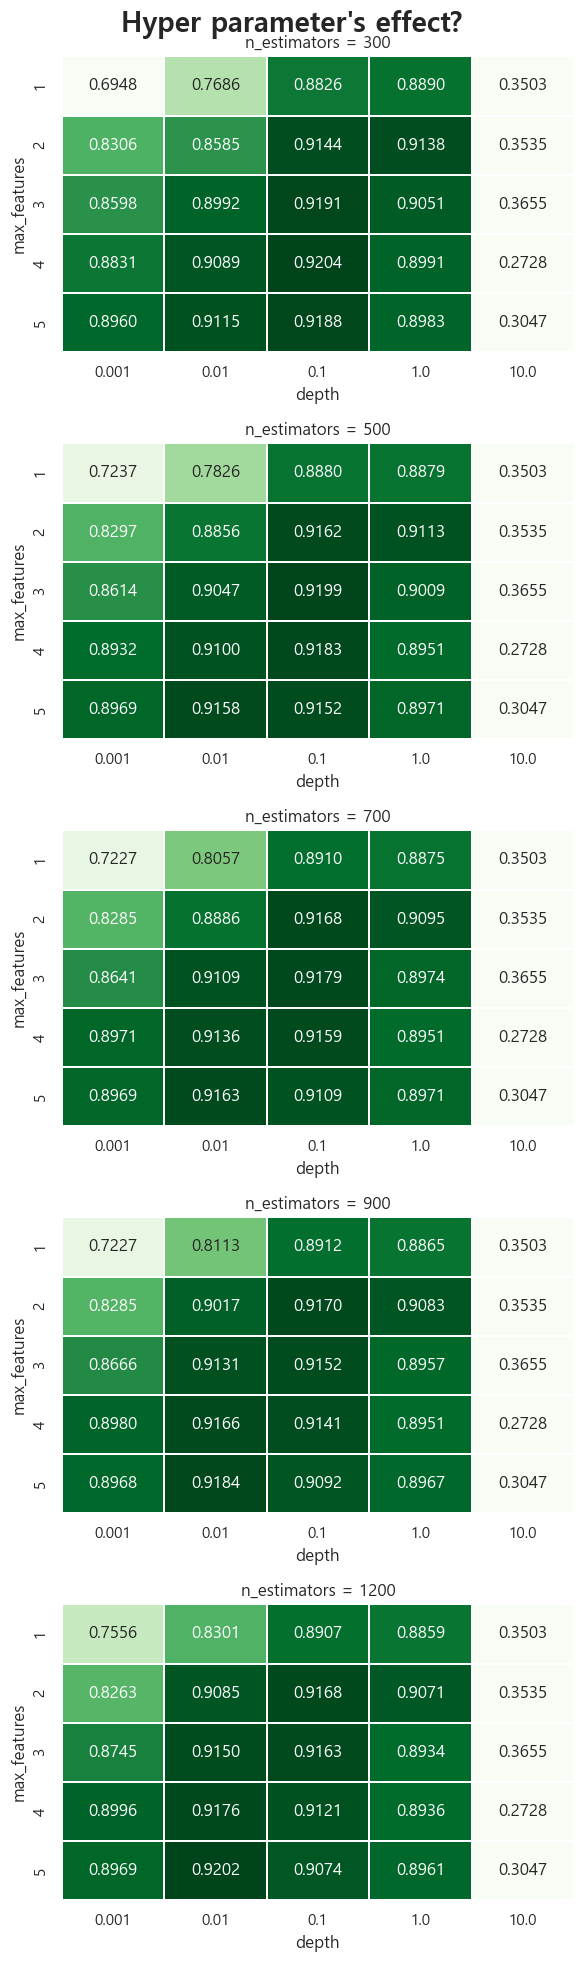

In [119]:
fig, axes = plt.subplots(5,1,figsize = (6, 20))
axes = axes.ravel()

for i in range(5):
    df = pd.DataFrame(results[i], index = param_grid["max_depth"], columns = param_grid["learning_rate"])
    sns.heatmap(df, cmap = "Greens", ax = axes[i], vmin = 0.7, vmax = 0.921, cbar = False, lw = 0.2, annot = True,fmt = ".4f",
                fontweight="bold")
    axes[i].set_xlabel("depth")
    axes[i].set_ylabel("max_features")
    estimators = param_grid["n_estimators"][i]
    axes[i].set_title(f"n_estimators = {estimators}")

plt.suptitle("Hyper parameter's effect?",fontweight = "bold", fontsize = 20, ha ="center")

plt.tight_layout()

# import matplotlib.cm as cm    
# import matplotlib as mpl

# norm = mpl.colors.Normalize(vmin=0.88, vmax=0.92)

# plt.subplots_adjust(wspace = 0.25, bottom=0.1, right= 0.82, top = 0.85)
# cax = plt.axes([0.85, 0.1, 0.02, 0.75])
# plt.colorbar(cm.ScalarMappable(norm=norm, cmap="YlGnBu"), cax = cax)

# plt.show();
# print("Best params : ",grid.best_params_)
# print(f"Best score : {grid.best_score_:.4f}")

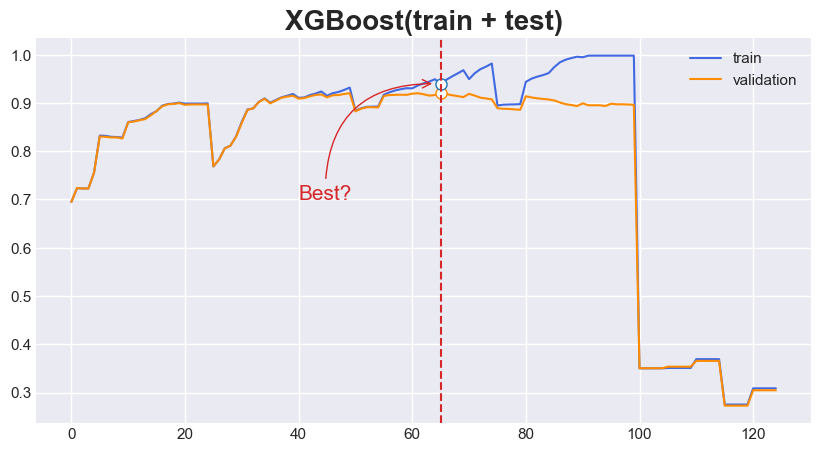

In [240]:
plt.style.use("seaborn-darkgrid")
results = pd.DataFrame(xgb_grid.cv_results_)
best_test_loc = results.mean_test_score[results.mean_test_score == xgb_grid.best_score_]
best_train_loc = results.mean_train_score[results.mean_test_score == xgb_grid.best_score_]

plt.figure(figsize = (10,5))
plt.plot(results.mean_train_score, label = "train", color="royalblue")
plt.plot(results.mean_test_score, label = "validation", color="darkorange")
plt.plot(best_test_loc.index, best_test_loc.values,
         marker = "o",markerfacecolor = "white", markersize = 8, color = "darkorange")

plt.plot(best_train_loc.index, best_train_loc.values,
         marker = "o", markerfacecolor = "white", markersize = 8, color = "tab:blue")
plt.axvline(x = best_train_loc.index, ls = "--", color = "tab:red")
plt.annotate("Best?", xy = (64, 0.94), xytext = (40, 0.7),color = "tab:red",fontsize = 15,
                 arrowprops = {"arrowstyle":"->","connectionstyle":"angle3", "color" : "tab:red"});
plt.title("XGBoost(train + test)", fontsize = 20, fontweight = "bold")
plt.legend(loc = "best");

In [92]:
print(classification_report(lgb_y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1267
           1       0.95      0.93      0.94      1229
           2       0.89      0.92      0.91      1383
           3       0.98      0.98      0.98      1229

    accuracy                           0.93      5108
   macro avg       0.93      0.93      0.93      5108
weighted avg       0.93      0.93      0.93      5108



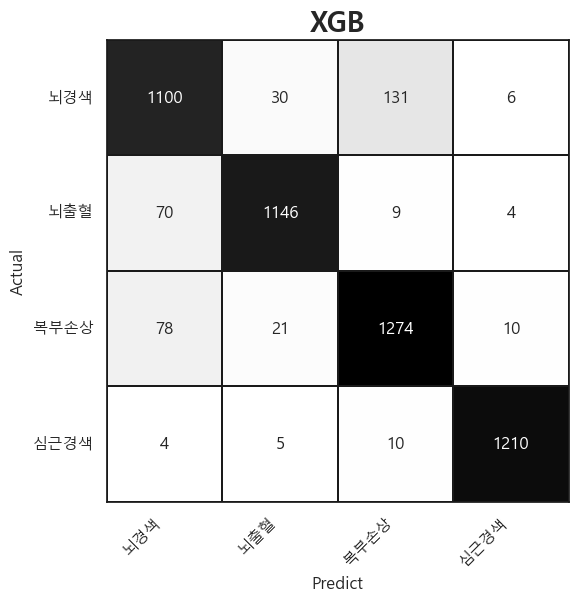

In [204]:
cm = pd.crosstab(lgb_y_test["중증질환"].values , xgb_pred)
cm.index = ['뇌경색', '뇌출혈', '복부손상', '심근경색']
cm.columns = ['뇌경색', '뇌출혈', '복부손상', '심근경색']

plt.figure(figsize = (6,6))
sns.heatmap(cm, annot = True, cmap = "binary", cbar = False, square = True, fmt = "d", lw = 0.2, linecolor = "k" )
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.xticks(rotation = 45, ha = "right")
plt.yticks(rotation = 0)
plt.title("XGB",fontweight = "bold", fontsize = 20)

ax = plt.gca()


for label in ["bottom","top","left","right"]:
    ax.spines[label].set_color("k")
    ax.spines[label].set_visible(True)

In [148]:
model_scores.loc["XGB", "score"] = round(accuracy_score(lgb_y_test, xgb_pred), 4)
model_scores

,score
DecisionTree,0.9152
RandomForest,0.9221
LGB,0.9221
LGB bagging,0.9227
XGB,0.926


- DNN

In [29]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Input, Activation, Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard

y = y[["중증질환"]].replace(list(y["중증질환"].unique()),[0,1,2,3])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [31]:
nfeatures = scaled_X_train.shape[1]
clear_session()

# 함수형 api를 적용, 이진 분류여서 output layer에 activation = "sigmoid"를 적용
inputs = Input(shape = (nfeatures,), name = "input")
hidden1 = Dense(128, activation = "relu", name = "hidden1")(inputs)
hidden2 = Dense(64, activation = "relu", name = "hidden2")(hidden1)
hidden3 = Dense(32, activation = "relu", name = "hidden3")(hidden2)
hidden4 = Dense(16, activation = "relu", name = "hidden4")(hidden3)
hidden5 = Dense(8, activation = "relu", name = "hidden5")(hidden4)
outputs = Dense(4, activation = "softmax", name = "output")(hidden5)

model = Model(inputs = inputs, outputs = outputs)
model.compile(optimizer = Adam(learning_rate = 0.01),
              loss = "sparse_categorical_crossentropy",
              metrics = ["acc"])


In [32]:
check_point_cb = ModelCheckpoint("model.h5", save_best_only = True)
early_stopping_cb = EarlyStopping(patience = 5, monitor = "val_loss", min_delta=0,
                                  restore_best_weights = True)
history = model.fit(scaled_X_train, y_train, epochs = 50,
                    validation_split = 0.3, callbacks = [check_point_cb, early_stopping_cb])

Epoch 1/50
261/261 [==============================] - 2s 4ms/step - loss: 0.3766 - acc: 0.8644 - val_loss: 0.2558 - val_acc: 0.9172
Epoch 2/50
261/261 [==============================] - 1s 3ms/step - loss: 0.2559 - acc: 0.9138 - val_loss: 0.2544 - val_acc: 0.9228
Epoch 3/50
261/261 [==============================] - 1s 3ms/step - loss: 0.2334 - acc: 0.9202 - val_loss: 0.2224 - val_acc: 0.9287
Epoch 4/50
261/261 [==============================] - 1s 3ms/step - loss: 0.2265 - acc: 0.9191 - val_loss: 0.2175 - val_acc: 0.9309
Epoch 5/50
261/261 [==============================] - 1s 2ms/step - loss: 0.2179 - acc: 0.9218 - val_loss: 0.2460 - val_acc: 0.9262
Epoch 6/50
261/261 [==============================] - 1s 2ms/step - loss: 0.2141 - acc: 0.9226 - val_loss: 0.2363 - val_acc: 0.9287
Epoch 7/50
261/261 [==============================] - 1s 3ms/step - loss: 0.2206 - acc: 0.9224 - val_loss: 0.2229 - val_acc: 0.9242
Epoch 8/50
261/261 [==============================] - 1s 3ms/step - loss: 0.

In [34]:
epochs = 9

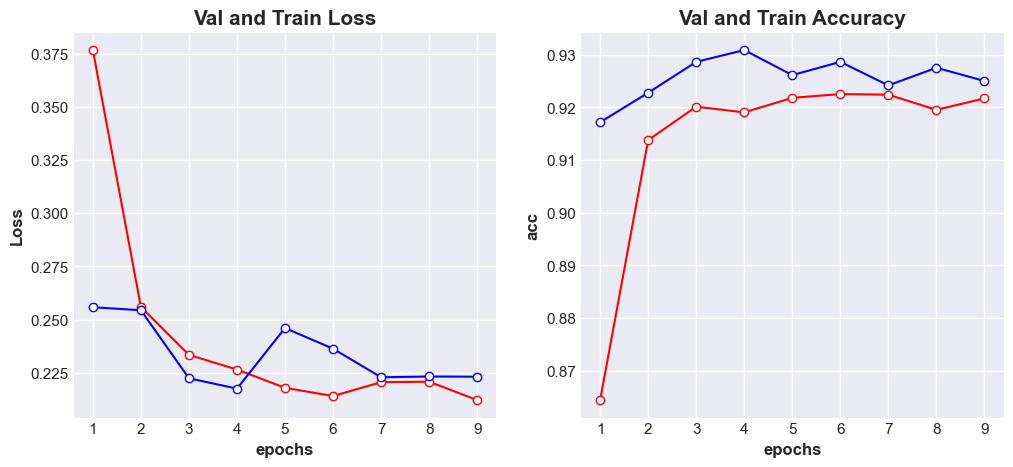

In [35]:
hist_dict = history.history 

train_loss = hist_dict["loss"]
train_acc = hist_dict["acc"]
val_loss = hist_dict["val_loss"]
val_acc = hist_dict["val_acc"]

plt.style.use("seaborn-darkgrid")
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.plot(range(1,epochs+1), train_loss, label = "train", color = "red", marker = "o", markerfacecolor = "white")
plt.plot(range(1,epochs+1), val_loss, label = "validation", color = "blue",  marker = "o", markerfacecolor = "white")
plt.xlabel("epochs", fontweight = "bold")
plt.ylabel("Loss", fontweight = "bold")
plt.title("Val and Train Loss", fontweight = "bold", fontsize = 15)

plt.subplot(1,2,2)
plt.plot(range(1,epochs+1), train_acc, label = "train", color = "red", marker = "o", markerfacecolor = "white")
plt.plot(range(1,epochs+1), val_acc, label = "validation", color = "blue", marker = "o", markerfacecolor = "white")
plt.xlabel("epochs", fontweight = "bold")
plt.ylabel("acc", fontweight = "bold")
plt.title("Val and Train Accuracy", fontweight = "bold", fontsize = 15);

In [36]:
load_model = load_model("model.h5")

In [ ]:
dnn_pred = load_model.predict(scaled_X_test).argmax(axis=1)

In [ ]:
print(classification_report(y_test, dnn_pred))

Test Score : 0.9205


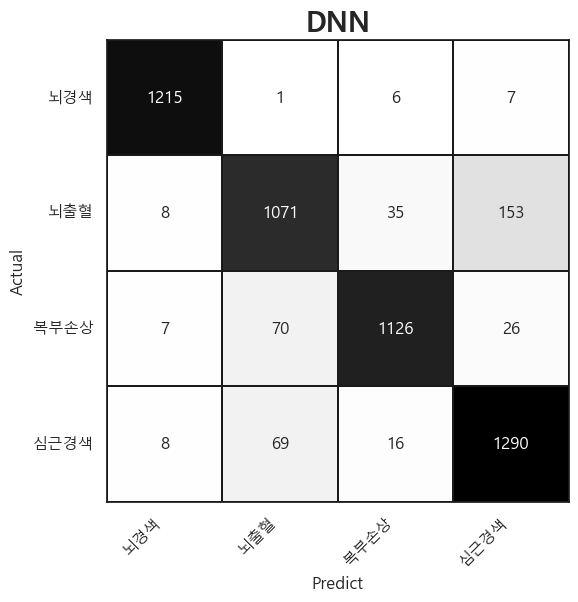

In [124]:
print(f"Test Score : {accuracy_score(y_test, dnn_pred):.4f}")

cm = pd.crosstab(y_test["중증질환"].values , dnn_pred)
cm.index = ['뇌경색', '뇌출혈', '복부손상', '심근경색']
cm.columns = ['뇌경색', '뇌출혈', '복부손상', '심근경색']

plt.figure(figsize = (6,6))
sns.heatmap(cm, annot = True, cmap = "binary", cbar = False, square = True, fmt = "d", lw = 0.2, linecolor = "k" )
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.xticks(rotation = 45, ha = "right")
plt.yticks(rotation=0)
plt.title("DNN",fontweight = "bold", fontsize = 20)

ax = plt.gca()


for label in ["bottom","top","left","right"]:
    ax.spines[label].set_color("k")
    ax.spines[label].set_visible(True);

In [149]:
model_scores.loc["DNN", "score"] = round(accuracy_score(y_test, dnn_pred), 4)
model_scores

,score
DecisionTree,0.9152
RandomForest,0.9221
LGB,0.9221
LGB bagging,0.9227
XGB,0.926
DNN,0.9205


# 3 최적 모델 선정 및 저장

In [152]:
model_scores.reset_index(inplace=True)
model_scores.rename(columns = {"index" : "model"}, inplace=True)
model_scores

,model,score
0,DecisionTree,0.9152
1,RandomForest,0.9221
2,LGB,0.9221
3,LGB bagging,0.9227
4,XGB,0.926
5,DNN,0.9205


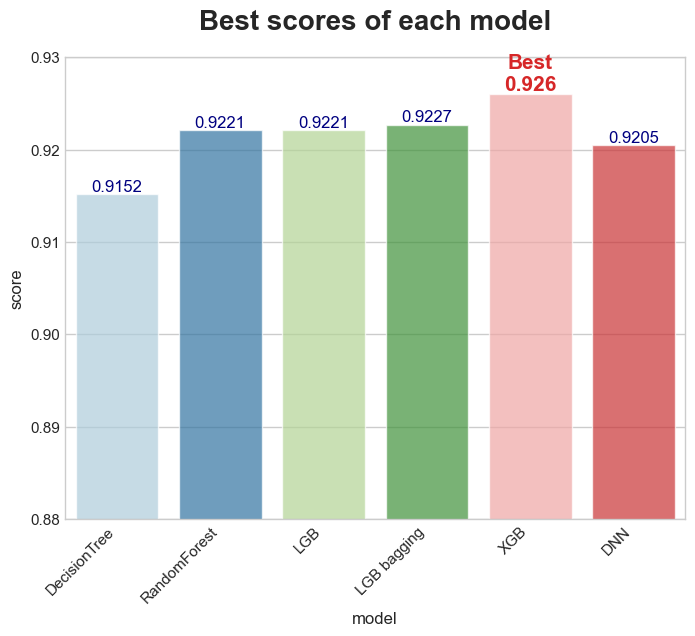

In [223]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize = (8,6))
sns.barplot(data = model_scores, x = "model", y = "score", palette="Paired", alpha=0.7)
plt.yticks(np.arange(0.8,1,0.01))
plt.xticks(rotation = 45, ha = "right");
plt.ylim(0.88,0.93)

# barplot 수치표시
for i in range(model_scores.shape[0]):
    if i == 4 :
        plt.text(i,model_scores["score"][i], f"Best\n{round(model_scores['score'][i],4)}", 
                 fontsize = 15, color='tab:red', fontweight = "bold",
                 ha ='center',  # horizontalalignment (left, center, right)
                 verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    
    else : 
        plt.text(i,model_scores["score"][i], round(model_scores["score"][i],4), 
                 fontsize = 12, color='navy', 
                 ha ='center',  # horizontalalignment (left, center, right)
                 verticalalignment='bottom')    # verticalalignment (top, center, bottom)
        
plt.title("Best scores of each model",fontweight = "bold", fontsize = 20, pad = 20);

In [ ]:
## 질문) 최적 모델로 선정된 것은 무엇인가?

import pickle
pickle.dump(ligthgbm, open('LightGBM', 'wb'))

## 모델 불러오기
ligthgbm = pickle.load(open('LightGBM', 'rb'))

## 4 새로운 증상으로 중증질환 예측하기

In [542]:
# 중증증상 리스트
symptom = {'뇌경색':0, '뇌출혈':1, '복부손상':2, '심근경색':3}
sym_list = ['뇌경색', '뇌출혈', '복부손상', '심근경색']

new_dispatch = {
    "ID" : [500001],
    "출동일시" :['2023-04-18'],
    "이름" : ['최**'],
    "성별" : ["여성"],
    "나이" : [35],
    "체온" : [36.5],
    "수축기 혈압" : [125],
    "이완기 혈압" : [85],
    "호흡 곤란":[0],
    "간헐성 경련":[0],
    "설사":[0],
    "기침":[0],
    "출혈":[1],
    "통증":[0],
    "만지면 아프다":[0],
    "무감각":[1],
    "마비":[1],
    "현기증":[0],
    "졸도":[1],
    "말이 어눌해졌다":[0],
    "시력이 흐려짐":[0],
    "중증질환" : [""],
    "이송 시간" : [0]
}



In [543]:
new_data = pd.DataFrame(new_dispatch)
new_x = new_data[['체온', '수축기 혈압', '이완기 혈압', '호흡 곤란', '간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다','무감각', '마비', '현기증', '졸도', '말이 어눌해졌다', '시력이 흐려짐']]
new_y = new_data[["중증질환"]]
new_x['발열'] = new_x["체온"].map(lambda x:1 if x >= 37 else 0)
new_x['고혈압'] = new_x["수축기 혈압"].map(lambda x:1 if x >= 140 else 0)
new_x['저혈압'] = new_x["수축기 혈압"].map(lambda x:1 if x <= 90 else 0)

In [500]:
# new_x["출동일시"] = pd.to_datetime(new_x["출동일시"])
# new_x['출동월'] = new_x["출동일시"].map(lambda x:x.month)
# new_x.drop(columns=["ID", "출동일시", "이름"], inplace=True)

In [561]:
# 예측 함수 정의하기
# input : 출동 이력 데이터 (new_dispatch, 딕셔너리 형태임)
# output : 중증 질환 명칭
# 함수 안에는 출동 이력 데이터를 전처리하는 과정이 필요함

# 모델 불러오기
ligthgbm = pickle.load(open('LightGBM', 'rb'))
sym_list = ['뇌경색', '뇌출혈', '복부손상', '심근경색']

def predict_disease(new_dispatch, model):
    new_data = pd.DataFrame(new_dispatch)
    new_x = new_data[['체온', '수축기 혈압', '이완기 혈압', '호흡 곤란', '간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다','무감각', '마비', '현기증', '졸도', '말이 어눌해졌다', '시력이 흐려짐']]
    new_y = new_data[["중증질환"]]
    new_x['발열'] = new_x["체온"].map(lambda x:1 if x >= 37 else 0)
    new_x['고혈압'] = new_x["수축기 혈압"].map(lambda x:1 if x >= 140 else 0)
    new_x['저혈압'] = new_x["수축기 혈압"].map(lambda x:1 if x <= 90 else 0)
    
    return sym_list[np.argmax(model.predict(new_x))]

In [562]:
# new_dispatch dictionary 형태로 전달됨

predict_disease(new_dispatch, lightgbm)

'뇌출혈'

## 미션3 Clear
## 수고하셨습니다!!